# Linear Regression: Gradient Descent vs. Scikit-learn

Linear Regression using the scikit-learn library using the [sklearn.linear_model.LinearRegression() class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). 

All three have a hyperparameter: step size or learning rate.

Linear Regression using Batch Gradient Search:
The entire dataset is used for the calculation of the gradient at a time, and iterated over a number of epochs. 
The convergence is a little slow for large datasets.

$$cost=\frac{1}{N} \sum_{i=1}^{N} (y_i-(wx_i-b))^2$$
$$\frac{\partial (cost)}{\partial w}=-\frac{2}{N} \sum_{i=1}^{N} x_i(y_i-(wx_i-b))$$
$$\frac{\partial (cost)}{\partial b}=-\frac{2}{N} \sum_{i=1}^{N} (y_i-(wx_i-b))$$

Linear Regression using Stochastic Gradient Descent:
An individual random datapoint is used for the calculation of the gradient at a time, and iterated over all the points (and over a number of epochs).
The steps are quite noisy, with a fluctuating cost function. 
However, it is computationally light for huge datasets and converges quickly to a global minima (and not get stuck in a local one.)

$$cost=(y_i-(wx_i-b))^2$$
$$\frac{\partial (cost)}{\partial w}=-2 x_i(y_i-(wx_i-b))$$
$$\frac{\partial (cost)}{\partial b}=-2 (y_i-(wx_i-b))$$

Linear Regression using mini-batch Gradient Descent:
A subset of the dataset is used for the calculation of the gradient at a time, itrating over all the subsets and iterated over a number of epochs.
It combines the ideas of both batch and stochastic gradient descent, with an additional hyperparameter: batch size, $n$.

$$cost=\frac{1}{n} \sum_{i=1}^{n} (y_i-(wx_i-b))^2$$
$$\frac{\partial (cost)}{\partial w}=-\frac{2}{n} \sum_{i=1}^{n} x_i(y_i-(wx_i-b))$$
$$\frac{\partial (cost)}{\partial b}=-\frac{2}{n} \sum_{i=1}^{n} (y_i-(wx_i-b))$$

The run-time is the smallest for scikit-learn libraries, followed by Batch Gradient Descent, mini-batch Gradient Descent and then stochastic Gradient descent for the same number of iterations.

The cost function converges to roughly the same value, with the convergenge fastest for Stochastic Gradient Descent, followed by mini-batch Gradient Descent and then Batch Gradient Descent.

By scikit-learn:
[-0.94788381]
14.895914074659268
Run time:0.0070302486419677734

By Batch Gradient Descent:
-0.9480476910254562
14.896805492975947
Run time:1.146533489227295

By Stochastic Gradient Descent:
-0.9469775133548697
14.896307232761158
Run time:6.733349800109863

By Mini Batch Gradient Descent:
-0.9423481045179842
14.895961302928331
Run time:3.459948778152466



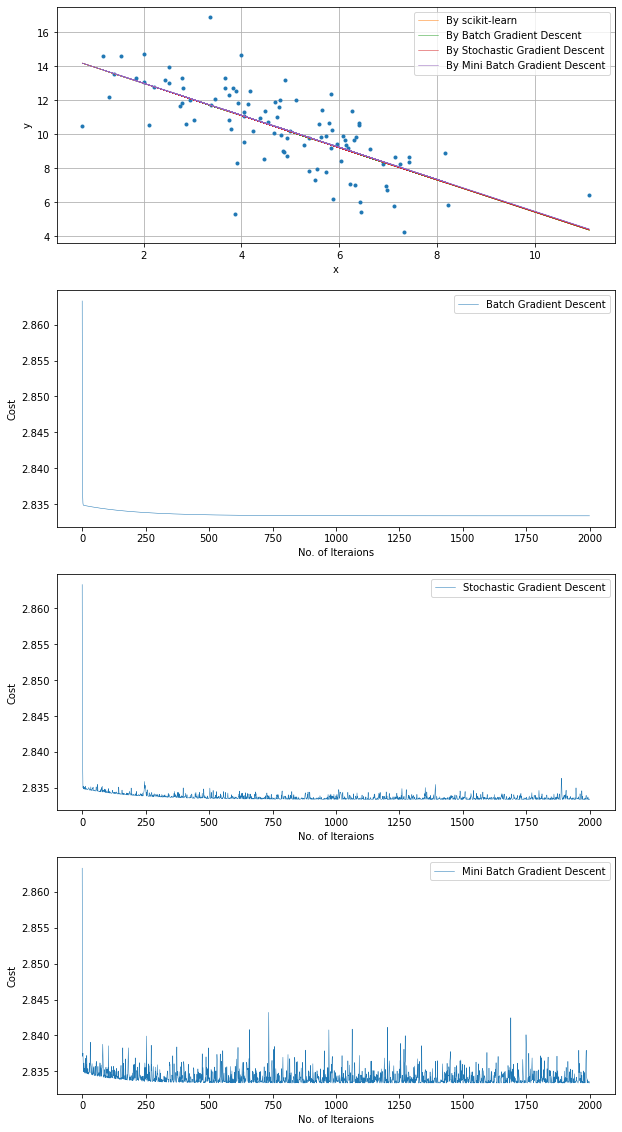

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

#method to implement batch gradient descent
def BatchGD(x, y, noOfIterations=2000, alpha=10e-3, b=15, w=-1):  #alpha: learning rate-hyperparameter
	cost=np.zeros(noOfIterations)
	for i in range(noOfIterations):
		cost[i]=np.sum(np.square(y-(b+w*x)))/(noOfSamples)   #calculate the cost in the current iteration
		diff_w=np.sum(-2*x*(y-(b+w*x)))/noOfSamples          #calculate the partial derivative wrt w
		diff_b=np.sum(-2*(y-(b+w*x)))/noOfSamples            #calculate the partial derivative wrt b
		w=w-alpha*diff_w                                     #update w
		b=b-alpha*diff_b                                     #update b
	return [w, b], cost

#method to implement stochastic gradient descent
def StochasticGD(x, y, noOfIterations=2000, alpha=10e-3, b=15, w=-1):
	cost=np.zeros(noOfIterations)
	noOfSamples=len(x)
	for i in range(noOfIterations):
		shuffle=np.random.permutation(noOfSamples)                  #pick points randomly
		cost[i]=np.sum(np.square(y-(b+w*x)))/(noOfSamples)
		for j in range(noOfSamples):
			diff_w=-2*x[shuffle[j]]*(y[shuffle[j]]-(b+w*x[shuffle[j]]))     #calculate the partial derivative wrt w
			diff_b=-2*(y[shuffle[j]]-(b+w*x[shuffle[j]]))                   #calculate the partial derivative wrt b
			w=w-alpha*diff_w                                                #update w
			b=b-alpha*diff_b                                                #update b
	return [w, b], cost

def getMiniBatches(x, y, batchSize, noOfSamples, randomize=True):           #function to create mini-batches
	if randomize==True:
		shuffle=np.random.permutation(noOfSamples)                          #make mini-batches randomly
	for start in range(0, noOfSamples, batchSize):
		end=min(start+batchSize, noOfSamples)                               #handling the last batch
		if randomize==True:
			batch=shuffle[start:end]
		else:
			batch=slice(start, end)
		yield x[batch], y[batch]                                            #return the batch of datapoints and labels

def miniBatchGD(x, y, batchSize=20, noOfIterations=2000, alpha=10e-3, b=15, w=-1):
	cost=np.zeros(noOfIterations)
	noOfSamples=len(x)
	noBatches=noOfSamples//batchSize
	
	for i in range(noOfIterations):
		cost[i]=np.sum(np.square(y-(b+w*x)))/(noOfSamples)
		for x_batch, y_batch in getMiniBatches(x, y, batchSize, noOfSamples):   #iterating over batches
			diff_w=np.sum(-2*x_batch*(y_batch-(b+w*x_batch)))/batchSize         #calculate the partial derivative wrt w
			diff_b=np.sum(-2*(y_batch-(b+w*x_batch)))/batchSize                 #calculate the partial derivative wrt b
			w=w-alpha*diff_w                                                    #update w
			b=b-alpha*diff_b                                                    #update b
	return [w, b], cost

noOfSamples=100
mean=np.array([5.0, 10.0])
corr=np.array([[  3.40, -2.75],	[ -2.75,  5.500]])
x, y=np.random.multivariate_normal(mean, corr, size=noOfSamples).T

start1=time.time()
#create a linear regression object
regress=linear_model.LinearRegression()

regress.fit(x.reshape(-1,1), y)
y_predict=regress.predict(x.reshape(-1,1))
end1=time.time()

start2=time.time()
theta_BatchGD, cost_BatchGD=BatchGD(x, y)
y_predictByBatchGD=theta_BatchGD[0]*x+theta_BatchGD[1]
end2=time.time()

start3=time.time()
theta_StochasticGD, cost_StochasticGD=StochasticGD(x, y, alpha=10e-5)
y_predictByStochasticGD=theta_StochasticGD[0]*x+theta_StochasticGD[1]
end3=time.time()

start4=time.time()
theta_miniBatchGD, cost_miniBatchGD=miniBatchGD(x, y, alpha=3*10e-4)
y_predictByMiniBatchGD=theta_miniBatchGD[0]*x+theta_miniBatchGD[1]
end4=time.time()

print('By scikit-learn:')
print(regress.coef_)
print(regress.intercept_)
print('Run time:'+(str)(end1-start1))
print()
print('By Batch Gradient Descent:')
print(theta_BatchGD[0])
print(theta_BatchGD[1])
print('Run time:'+(str)(end2-start2))
print()
print('By Stochastic Gradient Descent:')
print(theta_StochasticGD[0])
print(theta_StochasticGD[1])
print('Run time:'+(str)(end3-start3))
print()
print('By Mini Batch Gradient Descent:')
print(theta_miniBatchGD[0])
print(theta_miniBatchGD[1])
print('Run time:'+(str)(end4-start4))
print()

plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(x, y, '.')
plt.plot(x, y_predict, label='By scikit-learn', linewidth=0.5)
plt.plot(x, y_predictByBatchGD, label='By Batch Gradient Descent', linewidth=0.5)
plt.plot(x, y_predictByStochasticGD, label='By Stochastic Gradient Descent', linewidth=0.5)
plt.plot(x, y_predictByMiniBatchGD, label='By Mini Batch Gradient Descent', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(4,1,2)
plt.plot(np.arange(len(cost_BatchGD)), cost_BatchGD, label='Batch Gradient Descent', linewidth=0.5)
plt.xlabel('No. of Iteraions')
plt.ylabel('Cost')
plt.legend()

plt.subplot(4,1,3)
plt.plot(np.arange(len(cost_StochasticGD)), cost_StochasticGD, label='Stochastic Gradient Descent', linewidth=0.5)
plt.xlabel('No. of Iteraions')
plt.ylabel('Cost')
plt.legend()

plt.subplot(4,1,4)
plt.plot(np.arange(len(cost_miniBatchGD)), cost_miniBatchGD, label='Mini Batch Gradient Descent', linewidth=0.5)
plt.xlabel('No. of Iteraions')
plt.ylabel('Cost')
plt.legend()

plt.show()

Stochastic Gradient Descent gives much faster convergence.

By scikit-learn:
[-0.57893025]
-0.013771942470582426
Run time:0.013311624526977539

By Batch Gradient Descent:
-0.5789302376521587
-0.013730358706412494
Run time:0.46447205543518066

By Stochastic Gradient Descent:
-0.5788072893057628
-0.013663068199096086
Run time:15.078519105911255



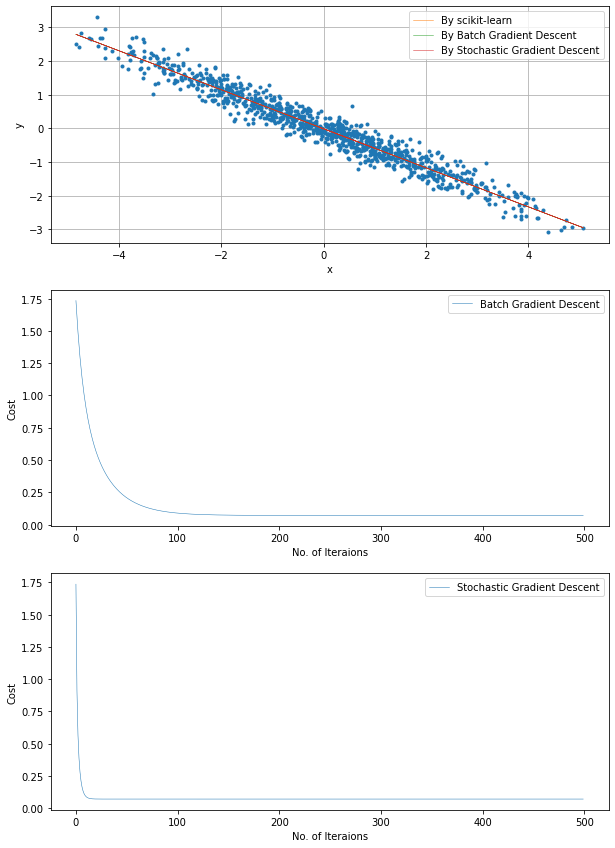

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import time

#method to implement batch gradient descent
def BatchGD(x, y, noOfIterations=500, alpha=10e-3, b=1, w=-1):  #alpha: learning rate-hyperparameter
	cost=np.zeros(noOfIterations)
	for i in range(noOfIterations):
		cost[i]=np.sum(np.square(y-(b+w*x)))/(noOfSamples)   #calculate the cost in the current iteration
		diff_w=np.sum(-2*x*(y-(b+w*x)))/noOfSamples          #calculate the partial derivative wrt w
		diff_b=np.sum(-2*(y-(b+w*x)))/noOfSamples            #calculate the partial derivative wrt b
		w=w-alpha*diff_w                                     #update w
		b=b-alpha*diff_b                                     #update b
	return [w, b], cost

#method to implement stochastic gradient descent
def StochasticGD(x, y, noOfIterations=500, alpha=10e-3, b=1, w=-1):
	cost=np.zeros(noOfIterations)
	noOfSamples=len(x)
	for i in range(noOfIterations):
		shuffle=np.random.permutation(noOfSamples)                  #pick points randomly
		cost[i]=np.sum(np.square(y-(b+w*x)))/(noOfSamples)
		for j in range(noOfSamples):
			diff_w=-2*x[shuffle[j]]*(y[shuffle[j]]-(b+w*x[shuffle[j]]))     #calculate the partial derivative wrt w
			diff_b=-2*(y[shuffle[j]]-(b+w*x[shuffle[j]]))                   #calculate the partial derivative wrt b
			w=w-alpha*diff_w                                                #update w
			b=b-alpha*diff_b                                                #update b
	return [w, b], cost

noOfSamples=1000
mean=np.array([0.0, 0.0])
corr=np.array([[  3.40, -2.00],	[ -2.00,  1.25]])
x, y=np.random.multivariate_normal(mean, corr, size=noOfSamples).T

start1=time.time()
#create a linear regression object
regress=linear_model.LinearRegression()

regress.fit(x.reshape(-1,1), y)
y_predict=regress.predict(x.reshape(-1,1))
end1=time.time()

start2=time.time()
theta_BatchGD, cost_BatchGD=BatchGD(x, y)
y_predictByBatchGD=theta_BatchGD[0]*x+theta_BatchGD[1]
end2=time.time()

start3=time.time()
theta_StochasticGD, cost_StochasticGD=StochasticGD(x, y, alpha=10e-5)
y_predictByStochasticGD=theta_StochasticGD[0]*x+theta_StochasticGD[1]
end3=time.time()

print('By scikit-learn:')
print(regress.coef_)
print(regress.intercept_)
print('Run time:'+(str)(end1-start1))
print()
print('By Batch Gradient Descent:')
print(theta_BatchGD[0])
print(theta_BatchGD[1])
print('Run time:'+(str)(end2-start2))
print()
print('By Stochastic Gradient Descent:')
print(theta_StochasticGD[0])
print(theta_StochasticGD[1])
print('Run time:'+(str)(end3-start3))
print()

plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
plt.plot(x, y, '.')
plt.plot(x, y_predict, label='By scikit-learn', linewidth=0.5)
plt.plot(x, y_predictByBatchGD, label='By Batch Gradient Descent', linewidth=0.5)
plt.plot(x, y_predictByStochasticGD, label='By Stochastic Gradient Descent', linewidth=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.subplot(4,1,2)
plt.plot(np.arange(len(cost_BatchGD)), cost_BatchGD, label='Batch Gradient Descent', linewidth=0.5)
plt.xlabel('No. of Iteraions')
plt.ylabel('Cost')
plt.legend()

plt.subplot(4,1,3)
plt.plot(np.arange(len(cost_StochasticGD)), cost_StochasticGD, label='Stochastic Gradient Descent', linewidth=0.5)
plt.xlabel('No. of Iteraions')
plt.ylabel('Cost')
plt.legend()

plt.show()